<a href="https://colab.research.google.com/github/Philliec459/Open-Source-Petrophysics/blob/main/1_Read_LAS_Explore_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
using_colab = True

In [2]:
if using_colab:

    !wget 'https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/HW-3.las'

    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx

    !pip install lasio


--2024-08-17 19:15:07--  https://github.com/Philliec459/Open-Source-Petrophysics/raw/main/HW-3.las
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Philliec459/Open-Source-Petrophysics/main/HW-3.las [following]
--2024-08-17 19:15:08--  https://raw.githubusercontent.com/Philliec459/Open-Source-Petrophysics/main/HW-3.las
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29211 (29K) [text/plain]
Saving to: ‘HW-3.las’

HW-3.las            100%[===================>]  28.53K  --.-KB/s    in 0.003s  

2024-08-17 19:15:08 (10.8 MB/s) - ‘HW-3.las’ saved [29211/29211]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Reservoir Characterization Workflow: Read in LAS Well Log Data


We have used the new hierarchical carbonate reservoir benchmarking case study created by Costa Gomes J, Geiger S, Arnold D to be used for reservoir characterization, uncertainty quantification and history matching(1)

## Explore well log data using Andy McDonalds methods dicussed in his Petrophysical Python Series


1.  Costa Gomes J, Geiger S, Arnold D. The Design of an Open-Source Carbonate Reservoir Model. Petroleum Geoscience,
    https://doi.org/10.1144/petgeo2021-067



---

## Python Requirements:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lasio

## Uncomment the Costa HW Well that you want to evaluate:

In [4]:
las = lasio.read("HW-3.las");elev_meas_ref = 160
#las = lasio.read("./data/HW-4.las");elev_meas_ref = 29
#las = lasio.read("./data/HW-5.las");elev_meas_ref = 36
#las = lasio.read("./data/HW-6.las");elev_meas_ref = 49
#las = lasio.read("./data/HW-7.las");elev_meas_ref = 367
#las = lasio.read("./data/HW-8.las");elev_meas_ref = 416
#las = lasio.read("./data/HW-9.las");elev_meas_ref = 492
#las = lasio.read("./data/HW-10.las");elev_meas_ref = 397
#las = lasio.read("./data/HW-24.las");elev_meas_ref = 426
#las = lasio.read("./data/HW-25.las");elev_meas_ref = 386
#las = lasio.read("./data/HW-26.las");elev_meas_ref = 375
#las = lasio.read("./data/HW-27.las");elev_meas_ref = 453
#las = lasio.read("./data/HW-28.las");elev_meas_ref = 430
#las = lasio.read("./data/HW-29.las");elev_meas_ref = 466
#las = lasio.read("./data/HW-30.las");elev_meas_ref = 590
#las = lasio.read("./data/HW-31.las");elev_meas_ref = 417
#las = lasio.read("./data/HW-32.las");elev_meas_ref = 441


## Explore LAS data from Lasio:

In [5]:
for item in las.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")

 (STRT): 7600.0
 (STOP): 8020.0
 (STEP): 0.5
 (NULL): -999.25
COMPANY (COMP): 
WELL (WELL): HW-3
FIELD (FLD): COSTA
LOCATION (LOC): 
SERVICE COMPANY (SRVC): 
ss} (DATE): 2018-02-06 14:55:40   : Log Export Date {yyyy-MM-dd HH:mm
PROVINCE (PROV): 
UNIQUE WELL ID (UWI): HW-3
API NUMBER (API): 


In [6]:
for curve in las.curves:
    print(curve.mnemonic)

DEPT
GR
RHOB
NPHI
DT
PHIE
RT
SW
SO
CORE_POR
CORE_PERM


In [7]:
las.keys()

['DEPT',
 'GR',
 'RHOB',
 'NPHI',
 'DT',
 'PHIE',
 'RT',
 'SW',
 'SO',
 'CORE_POR',
 'CORE_PERM']

In [8]:
for count, curve in enumerate(las.curves):
    print(f"Curve: {curve.mnemonic}, Units: {curve.unit}, Description: {curve.descr}")
print(f"There are a total of: {count+1} curves present within this file")

Curve: DEPT, Units: ft, Description: DEPTH
Curve: GR, Units: gAPI, Description: GR
Curve: RHOB, Units: g/cm3, Description: RHOB
Curve: NPHI, Units: ft3/ft3, Description: NPHI
Curve: DT, Units: us/ft, Description: DT
Curve: PHIE, Units: ft3/ft3, Description: PHIE
Curve: RT, Units: ohm.m, Description: RT
Curve: SW, Units: , Description: SW
Curve: SO, Units: , Description: SO
Curve: CORE_POR, Units: ft3/ft3, Description: CORE_POR
Curve: CORE_PERM, Units: mD, Description: CORE_PERM
There are a total of: 11 curves present within this file


In [9]:
df_log = las.df()

df_log.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
7805.0,16.28,2.24,0.04,56.07,0.02,76.28,0.73,0.27,0.4,NaN
7805.5,18.55,2.26,0.04,56.14,NaN,70.30,NaN,NaN,0.4,NaN
7806.0,19.75,2.27,0.03,56.21,NaN,64.33,NaN,NaN,0.4,NaN
7806.5,20.95,2.25,0.04,56.55,NaN,49.21,NaN,NaN,0.4,NaN
7807.0,22.15,2.22,0.04,56.89,0.01,34.00,NaN,NaN,0.4,NaN


In [10]:
df_log.describe()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
count,431.000000,431.000000,431.000000,356.000000,351.000000,431.000000,321.000000,321.000000,431.000000,355.000000
mean,12.321949,2.377146,0.098608,78.352219,0.244330,37.938445,0.120156,0.879844,21.533411,33.505972
std,3.870233,0.124291,0.050236,11.763271,0.095283,26.912727,0.145055,0.145055,13.169713,97.437032
min,8.130000,2.180000,0.010000,52.790000,0.000000,6.730000,0.040000,0.060000,0.300000,0.010000
25%,9.785000,2.290000,0.040000,68.655000,0.230000,20.975000,0.070000,0.900000,4.500000,5.150000
50%,10.820000,2.340000,0.110000,84.295000,0.290000,29.370000,0.090000,0.910000,29.250000,7.300000
75%,13.875000,2.400000,0.140000,88.287500,0.300000,48.035000,0.100000,0.930000,31.725000,19.000000
max,27.320000,2.760000,0.170000,90.620000,0.330000,186.310000,0.940000,0.960000,35.800000,990.000000


# Visualising Data Extent (from Andy McDonald):

Instead of the summary provided by the pandas describe() function, we can create a visualisation using matplotlib. Firstly, we need to work out where we have nulls (nan values). We can do this by creating a second dataframe and calling .notnull() on our well dataframe.  
  
As this returns a boolean (True or False) for each depth, we need to multiply by 1 to convert the values from True and False to 1 and 0 respectively.

In [11]:
well_nan = df_log.notnull() * 1

In [12]:
well_nan.head()

,GR,RHOB,NPHI,DT,PHIE,RT,SW,SO,CORE_POR,CORE_PERM
DEPT,,,,,,,,,,
7805.0,1,1,1,1,1,1,1,1,1,0
7805.5,1,1,1,1,0,1,0,0,1,0
7806.0,1,1,1,1,0,1,0,0,1,0
7806.5,1,1,1,1,0,1,0,0,1,0
7807.0,1,1,1,1,1,1,0,0,1,0


<ipython-input-13-993fc317dd77>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,10) , (0,0), rowspan=1, colspan = 1)


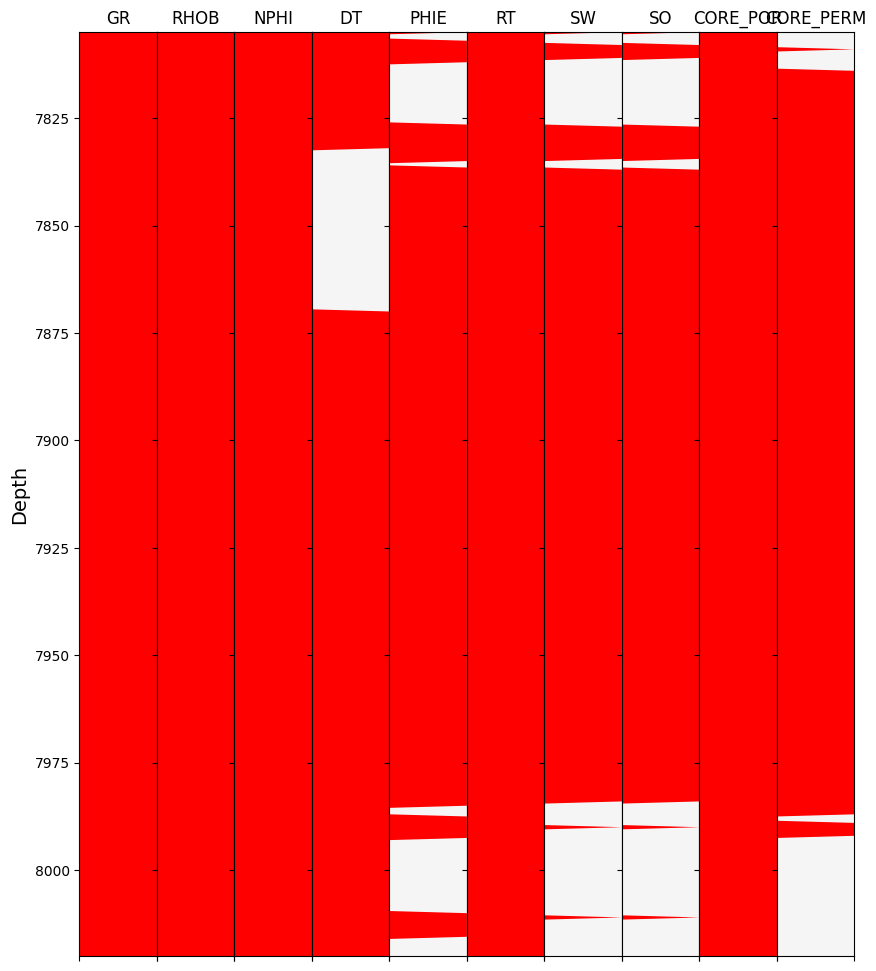

In [13]:
fig = plt.subplots(figsize=(10,12))

#Set up the plot axes
ax1 = plt.subplot2grid((1,10) , (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,10) , (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,10) , (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,10) , (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,10) , (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,10) , (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,10) , (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,10) , (0,7), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,10) , (0,8), rowspan=1, colspan = 1)
ax10 = plt.subplot2grid((1,10), (0,9), rowspan=1, colspan = 1)



columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    #ax.set_ylim(3000, 0)
    ax.set_ylim(max(las["DEPT"]),min(las["DEPT"]))
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    # Remove tick labels from each subplot
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()